# Introdução à Equações Diferenciais Ordinárias

In [1]:
# os pacotes abaixo são necessários para a execução dos exemplos
# linhas iniciadas por # são comentários
# e são ignoradas pelo interpretador Python

import numpy as np # processamento matemático
import matplotlib.pyplot as plt # criação de gráficos
from scipy.integrate import solve_ivp # solucionar eq. dif.

- Equação diferencial ordinária: uma equação relacionando uma função desconhecida $y(t)$, algumas derivadas de $y(t)$ e a variável $t$, geralmente representando o tempo
- Ordem: a ordem da maior derivada que aparece na equação diferencial
- $t$: variável independente
- $y$: variável dependente (depende de $t$)

## Exemplos

### Exemplo 1: Decaimento radioativo

Segundo a lei do decaimento radioativo, a taxa na qual os átomos radioativos desintegram é proporcional ao número total de átomos radioativos presente. Sendo $N(t)$ o número de átomos radioativos no tempo $t$, então $N'(t)$ é a taxa de mudança. A lei do decaimento radioativo é a que segue:
        
$N'(t) = -\lambda N(t)$

onde $\lambda$ é a constante de decaimento.

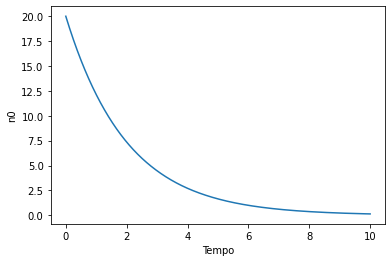

In [2]:
def decaimento(t, N):
    lamb = 0.5
    return -lamb * N

t0 = 0 # tempo inicial
n0 = 20 # valor inicial
tf = 10 # tempo final
dt = 0.001 # passo de integração
tvec = np.arange(t0, tf, dt) # vetor de tempo

# resolve a equação diferencial
sol = solve_ivp(decaimento, [t0, tf], [n0], t_eval=tvec)

# gera e exibe o gráfico
plt.plot(sol.t, sol.y[0])
plt.xlabel('Tempo')
plt.ylabel('n0')
plt.show()

### Exemplo 2: Equações de Lotka-volterra

Também conhecidas como equações predador-presa, são um par de equações diferenciais de primeira ordem, frequentemente usadas para descrever a dinâmica de sistemas biológicos de interação entre duas espécies, uma como predadora e a outra como presa. As populações de cada uma das espécies são dadas pelo par de equações:
$
x' = ax - bxy
\\
y' = dxy - cy\\
$
onde:
$
x: \text{presa}\\
y: \text{predador}\\
x', y': \text{taxas de variação de cada população}\\
a, b, c, d: \text{parâmetros que descrevem a interação entre as espécies}
$

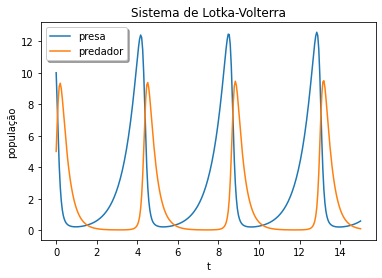

In [3]:
def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    return a*x - b*x*y, -c*y + d*x*y

# resolve as equações passando os parâmetros a, b, c, d
sol = solve_ivp(lotkavolterra, [0, 15], [10, 5], args=(1.5, 1, 3, 1),
                dense_output=True)
t = np.linspace(0, 15, 300) # vetor de tempo
z = sol.sol(t) # solução para os pontos do vetor de tempo

# gera e exibe o gráfico
plt.plot(t, z.T)
plt.xlabel('t')
plt.ylabel('população')
# coloca legenda para o par de equações
plt.legend(['presa', 'predador'], shadow=True)
plt.title('Sistema de Lotka-Volterra')
plt.show()

## Exemplo 3: Trajetória pendular

Um pêndulo é um dispositivo que contém uma massa atrelada a um fio e que oscila em torno de um ponto fixo. A equação do movimento para o ângulo $\theta$ (o ângulo que o pêndulo faz com a vertical) é:

$
\frac{d^2\theta}{dt^2} = -\frac{1}{Q}\frac{d\theta}{dt} + \sin{\theta} + d\cos{\Omega t}
$

onde:
$
t: \text{tempo}\\
Q: \text{fator de qualidade}\\
d: \text{amplitude}\\
\Omega: \text{frequência}
$
Como se trata de uma equação diferencial de segunda ordem, é necessário reduzí-la para duas equações de primeira ordem. Fazendo a substituição de variáveis $\omega = \frac{d\theta}{dt}$ podemos reescrever da seguinte maneira:
$
\frac{d\theta}{dt} = \omega
\\
\frac{d\omega}{dt} = -\frac{1}{Q}\omega + \sin{\theta} + d\cos{\Omega t}
$

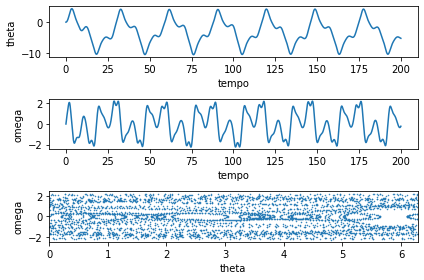

In [4]:
def pendulo(t, y, Q, d, Omega):
    theta, omega = y
    return omega, -omega/Q + np.sin(theta) + d*np.cos(Omega*t)

# parâmetros
Q = 2.0          # fator de qualidade
d = 1.5          # amplitude
Omega = 0.65     # frequência

# condições iniciais
theta0 = 0.0     # deslocamento angular inicial
omega0 = 0.0     # velocidade angular inicial

# parâmetros para solução
parametros = [Q, d, Omega]

# junta as condições iniciais
y0 = [theta0, omega0]

# cria o vetor de tempo
t0 = 0
tf = 200.
tinc = 0.05
tvec = np.arange(t0, tf, tinc)

# encontra a solução
sol = solve_ivp(pendulo, [t0, tf], y0, t_eval=tvec, args=parametros)

# gera o conjunto de figuras
_, ax = plt.subplots(3)

# theta em função do tempo
ax[0].plot(sol.t, sol.y[0])
ax[0].set_xlabel('tempo')
ax[0].set_ylabel('theta')

# omega em função do tempo
ax[1].plot(sol.t, sol.y[1])
ax[1].set_xlabel('tempo')
ax[1].set_ylabel('omega')

# omega vs theta
ax[2].plot(sol.y[0]%2*np.pi, sol.y[1], '.', ms=1)
ax[2].set_xlabel('theta')
ax[2].set_ylabel('omega')
ax[2].set_xlim(0, 2*np.pi)

plt.tight_layout()
plt.show()

## Funções e pacotes de código

Aqui serão descritas as sintaxes de uso de algumas funções do pacotes usados. No título das funções, elementos entre parêntesis são argumentos, que alteram o comportamento das funções. `**outros` indica que existem outros argumentos suportados pela função, mas não são apresentados neste texto.

### Numpy

O Numpy é um pacote para processamento matemático no Python. Dentre outros recursos, possui ferramentas para lidar com vetores e matrizes.

#### arange(comeco, final, passo, **outros)

Cria um vetor com elementos igualmente espaçados dentro de um intervalo. Os argumentos são:

- comeco (opcional): início do intervalo. Se ausente, começa em 0
- final: fim do intervalo. O intervalo não inclui esse valor (ex.: se final=10 a contagem vai até 9)
- passo (opcional): espaço entre valores. Se ausente, vale 1. A quantidade total de elementos no vetor depende desse argumento

#### linspace(comeco, final, numero_de_elementos, **outros)

Cria um vetor com elementos igualmente espaçados dentro de um intervalo. Os argumentos são:

- comeco (opcional): início do intervalo. Se ausente, começa em 0
- final: fim do intervalo. O intervalo não inclui esse valor (ex.: se final=10 a contagem vai até 9)
- numero_de_elementos (opcional): número de elementos no vetor. Se ausente, vale 50. Obrigatoriamente deve ser são negativo. O intervalo entre valores depende desse argumento

### Matplotlib

O Matplotlib é uma biblioteca para geração de figuras e imagens, utilizando uma sintaxe semelhante à usada no MATLAB.

#### plot(x, y, fmt, **outros)

Plota x versus y usando linhas ou marcadores. Os argumentos são:

- x (opcional): valores da abscissa. Se ausente, é usado um vetor no formato $0, 1, ..., N-1$, sendo $N$ o número de elementos de $y$
- y: valores da ordenada
- fmt (opcional): formatações básicas de cor, marcador e estilo de linha. Trata-se de um conjunto de caracteres definidos pela biblioteca que funcionam como atalhos para essas formatações (ex.: 'r' usa a cor vermelha, '.' usa pontos, 'bo' usa círculos vermelhos)

#### xlabel, ylabel, title(texto, **outros)

Nomeia o eixo da abscissa, da ordenada e o título da figura, respectivamente. O argumento `texto` é o texto a ser escrito nos respectivos lugares, sempre entre aspas simples ou duplas.

#### subplots(n_linhas, n_colunas, **outros)

Cria um conjunto de subplots na figura. Cada subplot pode receber vários plots. Os argumentos são:

- nlinhas, ncolunas (opcionais): o número de linhas e/ou colunas de subplots. Se ausentes, o valor padrão é 1 para cada um deles

#### tight_layout(**outros)

Ajusta o espaçamento entre os subplots.

#### show(**outros)

Exibe todas as figuras geradas. Por padrão, ao gerar uma figura (usando `plot`, por exemplo) elas não são de pronto exibidas, sendo necessário este comando para a exibição das mesmas.

### Scipy

O Scipy é um pacote usado para processamento científico. Nele, utilizamos a ferramenta para resolver equações diferenciais numericamente.

#### solve_ivp(funcao, intervalo_de_tempo, y0, t_eval, dense_output, **outros)

Encontra a solução de equações diferenciais para valores iniciais dados. Os argumentos são:

- funcao: função com as equações  a serem resolvidas
- intervalo_de_tempo: são os instantes inicial ($t0$) e final ($tf$) de integração. A integração começa em $tf$ e vai até $tf$
- y0: condições iniciais para cada equação
- t_eval (opcional): vetor de tempo, indicando os instantes onde será feita a integração numérica. Se ausente, o pacote seleciona os pontos de integração
- dense_output (opcional): se presente, a solução é calculada de maneira continua no intervalo de tempo

## Referências

### Adkins, W. A. & Davidson, M. G., "Ordinary Differential Equations", Springer New York, 2012

### [Radioactive decay - Wikipedia](https://en.wikipedia.org/wiki/Radioactive_decay)

### [Lotka-Volterra equations - Wikipedia](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations)

### [Pendulum - Wikipedia](https://en.wikipedia.org/wiki/Pendulum)

### [9. Numerical Routines: SciPy and NumPy - PyMan 0.9.31 documentation](https://physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html)

### [Overview - NumPy v1.21 Manual](https://numpy.org/doc/stable/)

### [Overview - Matplotlib 3.4.2 documentation](https://matplotlib.org/stable/contents.html)

### [scipy.integrate.solve_ivp - Scipy v1.7.0 Manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)
